# <center> **CS 391, Spring 2021, Lab 1**
# <center> Topic: Gaussian Mixture Models

## 1. Expectation maximization: an example using coin tosses

An excellent piece using a classic example written by Karl Rosean: http://karlrosaen.com/ml/notebooks/em-coin-flips/

## 2.  Gaussian Mixture Models: an example using the iris dataset

First of all, we will be using a new Python package called seaborn.  Seaborn is a data visualization library based on matplotlib, and is very powerful and intuitive to use.  Since it does not come pre-installed with Anaconda, make sure you install version 11:  https://seaborn.pydata.org/index.html

If you have trouble installing seaborn on your machine, use Google Colab for this week's lab and homework instead!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd

Today, we will be using the famous iris dataset, which includes data about the sepal length, sepal width, petal length, and petal width of three different species of iris flowers.

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's start by visualizing the dataset with some scatterplots.  Can you clearly identify three different clusters in the following scatterplot?

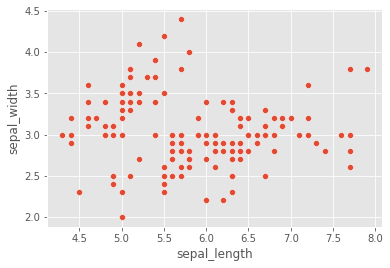

In [44]:
sns.scatterplot(data=iris, x ='sepal_length', y='sepal_width')

Now, let's look at the same scatterplot, but with each data point colored to represent its species:

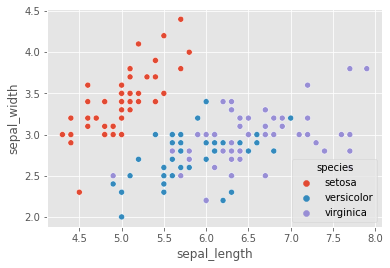

In [46]:
sns.scatterplot(data=iris, x ='sepal_length', y='sepal_width', hue='species')

We can do the same for petal length vs. petal width:

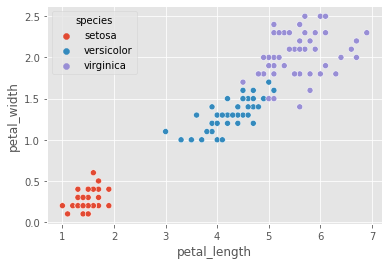

In [48]:
sns.scatterplot(data=iris, x ='petal_length', y='petal_width', hue='species')

Next, let's look at a histogram of sepal lengths.  Can you clearly identify three separate normal distributions?

Text(0.5, 1.0, 'Sepal Length in Irises')

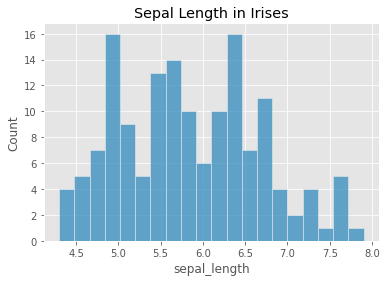

In [31]:
sns.histplot(data=iris, x='sepal_length', bins = 20)
plt.title("Sepal Length in Irises")

Here's the same histogram, but color-coded for species.  Note how the sepal lenght distributions all three species overlap and run into each other.

Text(0.5, 1.0, 'Sepal Length in Irises')

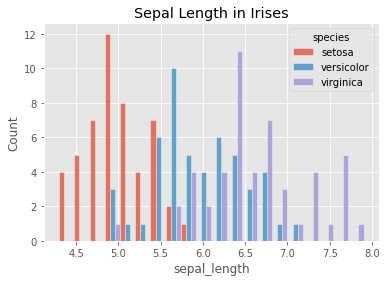

In [32]:
sns.histplot(data=iris, x='sepal_length', bins = 20, hue='species', multiple='dodge')
plt.title("Sepal Length in Irises")

Let's try the same thing for petal length.  Can you clearly categorize the irises into three species based on this graphic?

Text(0.5, 1.0, 'Petal Length in Irises')

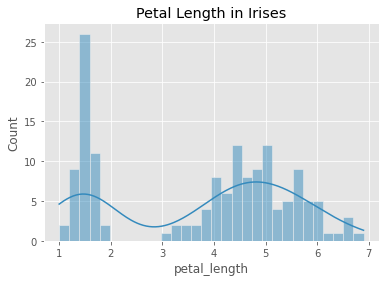

In [26]:
sns.histplot(data=iris, x='petal_length', bins = 30, kde=True)
plt.title("Petal Length in Irises")

And, again, here is the same histogram, now color-coded for species.

Text(0.5, 1.0, 'Petal Length in Irises')

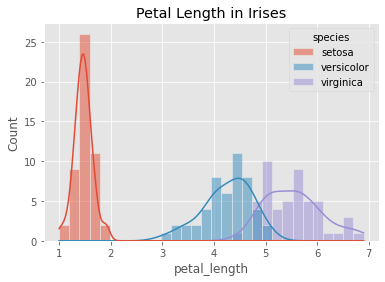

In [29]:
sns.histplot(data=iris, x='petal_length', bins = 30, kde=True, hue='species')
plt.title("Petal Length in Irises")

Let's use the Gaussian Mixture Model method from scikit learn to try to distinguish the different groups of species.  We will train our model on numerical data only: sepal width, sepal length, petal width, and petal length.

In [40]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)

X = iris[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]

gmm.fit(X)

labels = gmm.predict(X)

iris['label'] = labels

# the following line makes Jupyter display the entire DataFrame, without any ...s
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(iris[['species', 'label']])

        species  labels
0        setosa       2
1        setosa       2
2        setosa       2
3        setosa       2
4        setosa       2
5        setosa       2
6        setosa       2
7        setosa       2
8        setosa       2
9        setosa       2
10       setosa       2
11       setosa       2
12       setosa       2
13       setosa       2
14       setosa       2
15       setosa       2
16       setosa       2
17       setosa       2
18       setosa       2
19       setosa       2
20       setosa       2
21       setosa       2
22       setosa       2
23       setosa       2
24       setosa       2
25       setosa       2
26       setosa       2
27       setosa       2
28       setosa       2
29       setosa       2
30       setosa       2
31       setosa       2
32       setosa       2
33       setosa       2
34       setosa       2
35       setosa       2
36       setosa       2
37       setosa       2
38       setosa       2
39       setosa       2
40       setosa 